# Bike Store Data sales analysis

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

## Import Data Base

In [2]:
conn = sqlite3.connect("data/Bike_Store.sqllite")
c = conn.cursor()

## Annual Sales Analysis

In [3]:
# write the query
query = """
    SELECT
    SUBSTRING(order_date,1,4)||'-'||SUBSTRING(order_date,6,2) AS O_date,
    ROUND(SUM((list_price*quantity)*(1-discount)),0) AS Value
    FROM order_items oi 
    INNER JOIN orders o ON oi.order_id = o.order_id
    GROUP BY O_date;
"""
# Execute the query
c.execute(query)
#Fetch and print the results
c.fetchall()
sales = pd.read_sql_query(query, conn)

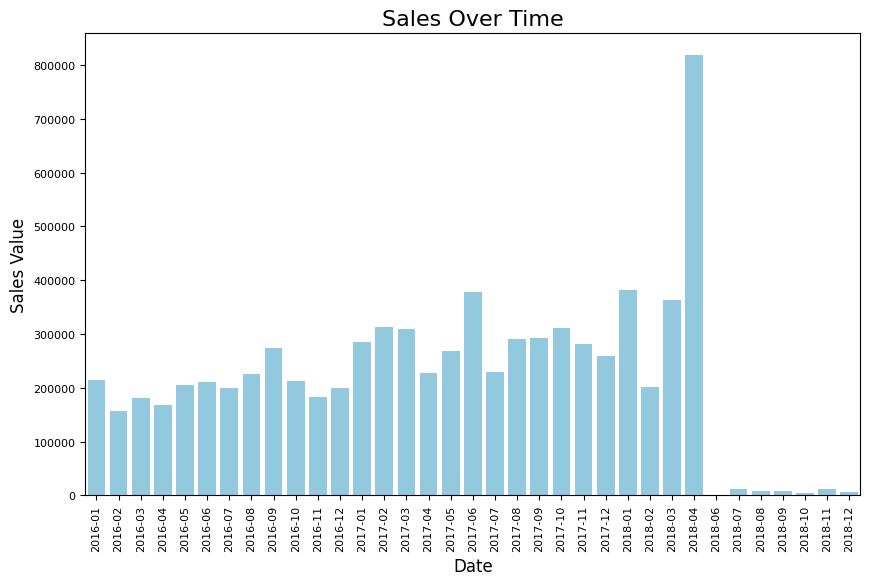

In [4]:
# Create the line plot
plt.figure(figsize=(10, 6))
sns.barplot(x='O_date', y='Value', data=sales, color='skyblue')
# Add title and labels
plt.title('Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Value', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
# Show the plot
plt.show()

Note: Looks like the sales has going ok but on April they probably burn all prices to finish the stock and close the stores.

### Annual Sales per Store

In [5]:
query = """
    SELECT
    SUBSTRING(order_date,1,4)||'-'||SUBSTRING(order_date,6,2) AS O_date,
    store_id,
    ROUND(SUM((list_price*quantity)*(1-discount)),0) AS Value
    FROM order_items oi 
    INNER JOIN orders o ON oi.order_id = o.order_id
    GROUP BY O_date,store_id;
"""
c.execute(query)
c.fetchall()
sales_store = pd.read_sql_query(query, conn)

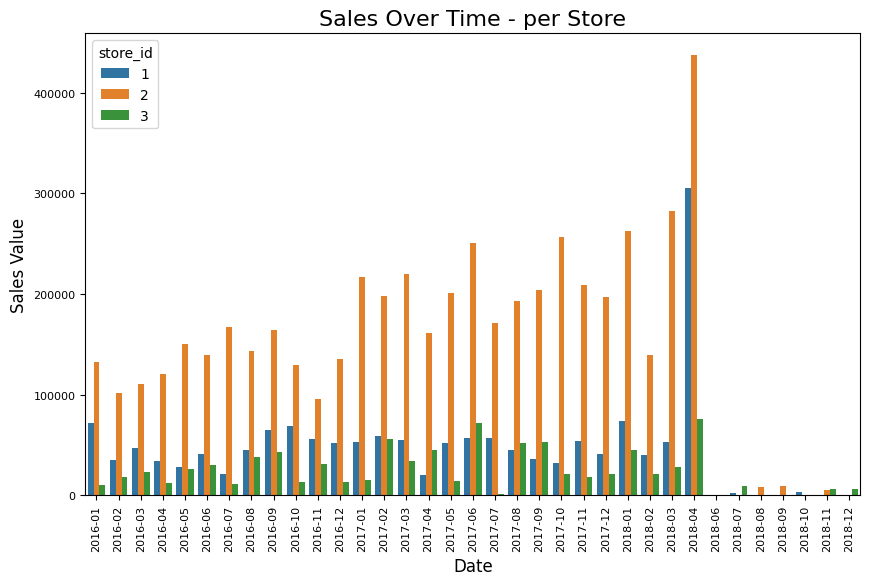

In [6]:
# Create the line plot
plt.figure(figsize=(10, 6))
sns.barplot(x='O_date', y='Value', data=sales_store, hue ='store_id')
# Add title and labels
plt.title('Sales Over Time - per Store', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Value', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
# Show the plot
plt.show()

Note: Store 2 has a really god result but the other 2 not so much. Except store 1 during the probable stocks sales. 

### Annual Sale per Category

In [7]:
query = """
    SELECT
    SUBSTRING(order_date,1,4)||'-'||SUBSTRING(order_date,6,2) AS O_date,
    ROUND(SUM((oi.list_price*quantity)*(1-discount)),0) AS Value,
    SUM(oi.quantity) AS quant,
    category_name,
    ROUND(SUM((oi.list_price*quantity)*(1-discount)),0) / SUM(oi.quantity) AS average_value
    FROM order_items oi 
    INNER JOIN orders o ON oi.order_id = o.order_id
    INNER JOIN products p ON oi.product_id = p.product_id 
    INNER JOIN categories c ON p.category_id = c.category_id
    GROUP BY O_date, category_name;
"""
c.execute(query)
c.fetchall()
sales_cat = pd.read_sql_query(query, conn)

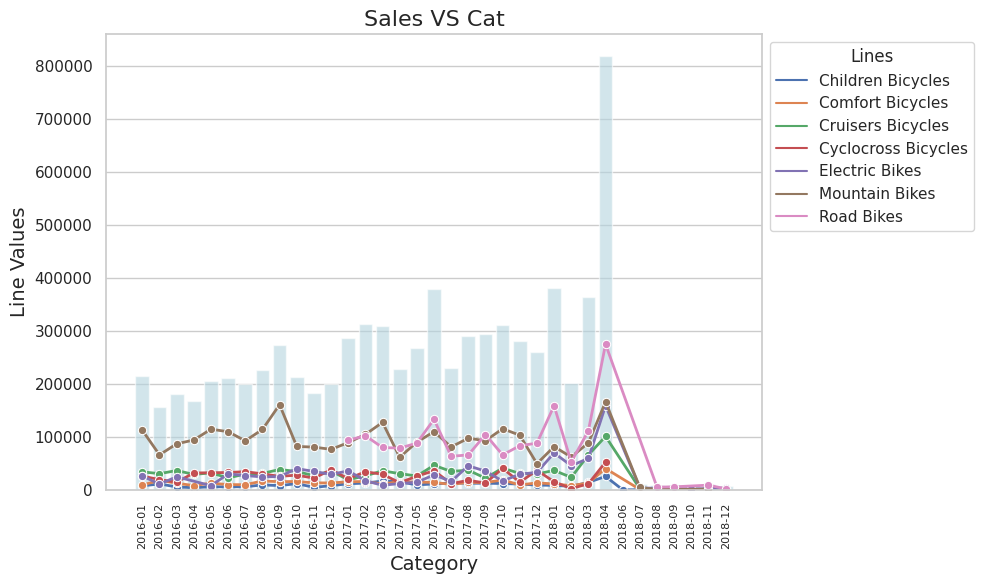

In [8]:
# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot
sns.barplot(x='O_date', y='Value', data=sales, ax=ax1, color='lightblue', alpha=0.6)

# Create a second y-axis
# ax2 = ax1.twinx()

sns.lineplot(data=sales_cat, x='O_date', y='Value', hue='category_name', marker='o', linewidth=2)

# # Plot each line on the same axes
# for line in sales_ticket['category_name'].unique():
#     sns.lineplot(x='O_date', y='quantity', data=sales_ticket, 
#                  ax=ax2, marker='o', linewidth=1, label=line)

# Add titles and labels
ax1.set_title('Sales VS Cat', fontsize=16)
ax1.set_xlabel('Category', fontsize=14)
ax1.set_ylabel('Bar Values', fontsize=14)
ax1.set_ylabel('Line Values', fontsize=14)

# Rotate x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize = 8)

plt.legend(title='Lines', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Note: It doesn't looks like they have any particular issue with any category.

### Annual Sales - Discount analysis

In [9]:
query = """
    SELECT
    SUBSTRING(order_date,1,4)||'-'||SUBSTRING(order_date,6,2) AS O_date,
    ROUND(SUM((oi.list_price*quantity)*(1-discount)),0) AS Value,
    ROUND(SUM(oi.list_price*quantity),0) AS List_Value,
    ROUND((1-(SUM((oi.list_price*quantity)*(1-discount))/SUM(oi.list_price*quantity)))*100,2) AS Discount
    FROM order_items oi 
    INNER JOIN orders o ON oi.order_id = o.order_id
    GROUP BY O_date;
"""
c.execute(query)
c.fetchall()
sales_disc = pd.read_sql_query(query, conn)

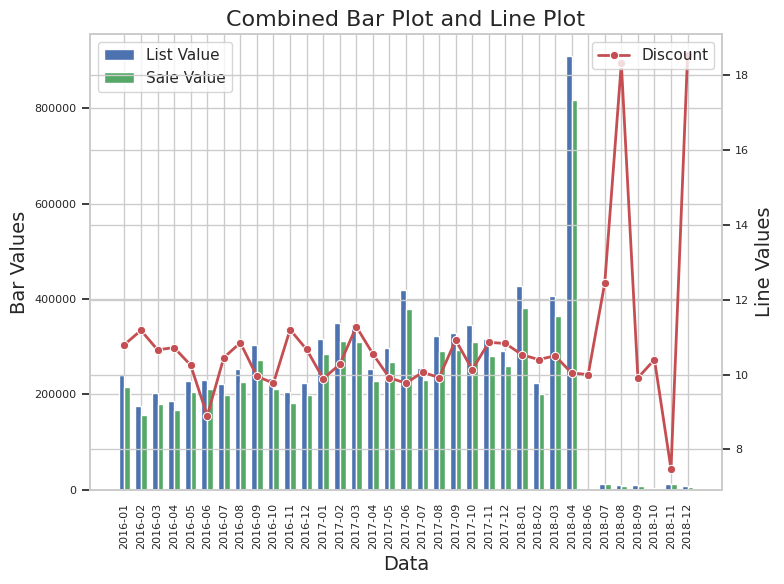

In [10]:
# Set the plot style
sns.set(style="whitegrid")

# Set figure size
fig, ax1 = plt.subplots(figsize=(8, 6))

# Define bar width and position shift
bar_width = 0.35
index = np.arange(len(sales_disc['O_date']))

# Plot the first set of bars (Value1)
ax1.bar(index, sales_disc['List_Value'], bar_width, label='List Value', color='b')

# Plot the second set of bars (Value2) shifted to the right
ax1.bar(index + bar_width, sales_disc['Value'], bar_width, label='Sale Value', color='g')

# Set the labels and title for the bar plot
ax1.set_xlabel('Data', fontsize=14)
ax1.set_ylabel('Bar Values', fontsize=14)
ax1.set_title('Combined Bar Plot and Line Plot', fontsize=16)

# Add x-ticks with category labels
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(sales_disc['O_date'])

plt.xticks(rotation=90, fontsize=8)
plt.yticks( fontsize=8)
# Create a second y-axis for the line plot
ax2 = ax1.twinx()  # instantiate a second y-axis that shares the same x-axis

# Plot the line plot (Value3)
sns.lineplot(x=index + bar_width / 2, y=sales_disc['Discount'], ax=ax2, color='r', marker='o', linewidth=2, label='Discount')

# Set the labels for the line plot
ax2.set_ylabel('Line Values', fontsize=14)

# Show the legends for both plots
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.yticks( fontsize=8)
# Show the plot
plt.tight_layout()

plt.show()


Note: The best sales moth doesn't have a big discount. Only after apparently to finish stock.

###  Annual Sales - Brand analysis

In [11]:
query = """
    SELECT
    SUBSTRING(order_date,1,4)||'-'||SUBSTRING(order_date,6,2) AS O_date,
    ROUND(SUM((oi.list_price*quantity)*(1-discount)),0) AS Value,
    b.brand_name 
    FROM order_items oi 
    INNER JOIN orders o ON oi.order_id = o.order_id
    INNER JOIN products p ON oi.product_id = p.product_id 
    INNER JOIN brands b ON p.brand_id = b.brand_id 
    GROUP BY O_date,p.brand_id;
"""
c.execute(query)
c.fetchall()
sales_brand = pd.read_sql_query(query, conn)

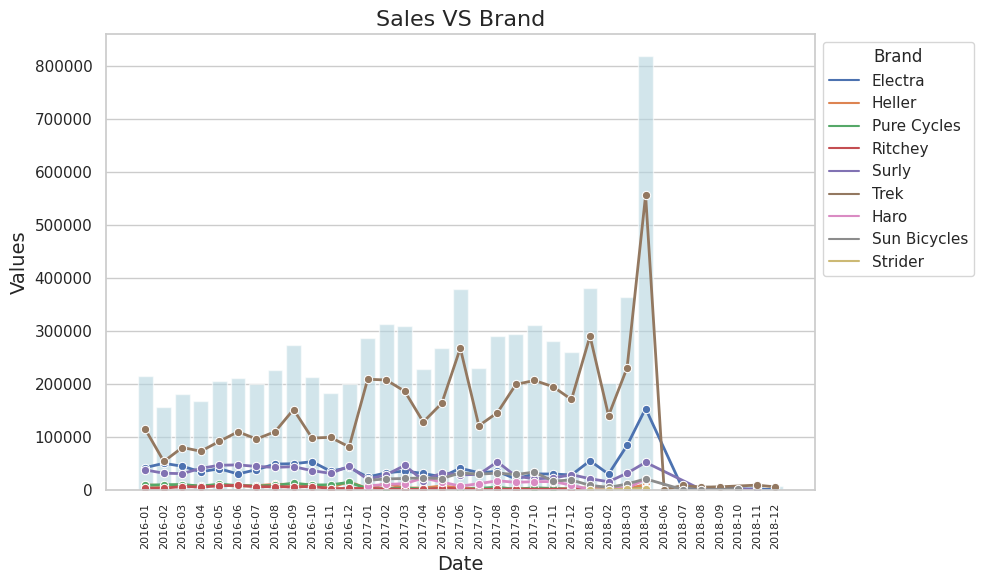

In [14]:
# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot
sns.barplot(x='O_date', y='Value', data=sales, ax=ax1, color='lightblue', alpha=0.6)

# Create a second y-axis
# ax2 = ax1.twinx()

sns.lineplot(data=sales_brand, x='O_date', y='Value', hue='brand_name', marker='o', linewidth=2)

# # Plot each line on the same axes
# for line in sales_ticket['category_name'].unique():
#     sns.lineplot(x='O_date', y='quantity', data=sales_ticket, 
#                  ax=ax2, marker='o', linewidth=1, label=line)

# Add titles and labels
ax1.set_title('Sales VS Brand', fontsize=16)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Values', fontsize=14)
ax1.set_ylabel('Values', fontsize=14)

# Rotate x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize = 8)

plt.legend(title='Brand', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Note: They are extremely dependent of one brand "Trek". One possibility is that they lost there representation contract.